In [51]:
!pip install yfinance
!pip install mplfinance
!pip3 install python-graphviz

ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz


In [52]:
# Import packages

import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
import yfinance as yf
import mplfinance as mpf
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import math
import graphviz
import seaborn as sns
from math import floor
from math import ceil
from sklearn.cluster import KMeans
from scipy.stats import sem
from matplotlib.ticker import MaxNLocator
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from itertools import product
from scipy.stats import genextreme

# Part 1: Importing input data

In [53]:
# Load data from individual assets

start_date = datetime(1986, 5, 6)
end_date = datetime(2023, 10, 20)

stocks_J = ['MRK','DIS','BA','AXP','HD',
'VZ','MMM','IBM','KO','HON',
'MCD','JNJ','TRV','UNH','CVX',
'WMT','PG','AMGN','JPM',
'WBA','INTC','CAT','MSFT',
'DD','AA','HPQ','T','GE',
'RTX','IP','CLF','C','K','XOM','GT','FL','AIG',
'MO','PFE','BAC','NKE','AAPL']

stocks = ['MMM','AA', 'AXP','AMGN', 'AAPL', 'BA', 'BAC', 'C', 'CAT', 'CVX', 'CSCO', 'KO', 'DOW','DD', 'XOM', 'GS', 'HD', 'HON','HPQ', 'INTC','IBM', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'CRM', 'RTX', 'T', 'TRV', 'UNH', 'VZ', 'V', 'WBA','WMT', 'DIS', 'AIG', 'MO',  'IP', 'GT', 'WEC', 'KODK']

# Read all data
price_data = [yf.download(stock, start=start_date, end=end_date)["Close"] for stock in stocks_J]
result = pd.concat(price_data, axis = 1)

result.shape
result.head()


/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please 

,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,...,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
Date,,,,,,,,,,,,,,,,,,,,,
1986-05-06,4.708042,3.781583,12.750000,7.853265,0.370370,14.023814,12.796875,36.866634,2.281250,11.887326,...,9.917840,7.468750,15.5625,18.84375,106.613991,5.270833,2.396624,6.500000,0.250000,0.145647
1986-05-07,4.721295,3.709651,12.500000,7.644059,0.373114,13.855191,12.656250,36.149616,2.263021,11.887326,...,9.917840,7.218750,15.6875,18.75000,104.717697,5.270833,2.376858,6.562500,0.248047,0.140625
1986-05-08,4.737860,3.750755,12.638889,7.515317,0.373114,13.995710,12.593750,35.611855,2.268229,11.976705,...,9.947183,7.328125,15.8750,19.40625,100.714401,5.333333,2.366975,6.500000,0.250000,0.147321
1986-05-09,4.767679,3.802135,12.777778,7.467038,0.367627,13.995710,12.671875,35.791107,2.250000,11.887326,...,10.211268,7.328125,15.8125,19.50000,103.453499,5.385417,2.381799,6.515625,0.251953,0.148996
1986-05-12,4.744487,3.843240,12.722222,7.579688,0.375857,13.939503,12.500000,35.850861,2.270833,11.619191,...,10.152582,7.421875,15.5625,19.65625,101.557205,5.437500,2.376858,6.437500,0.251953,0.162388


In [54]:
# Load data from DJI index

start_date = datetime(1986, 5, 5)
end_date = datetime(2023, 10, 1)
data = yf.download('^DJI', start=start_date, end=end_date)
#mpf.plot(data,type='candle',mav=(3,6,9),volume=False,show_nontrading=True)

data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1992-01-02,3152.100098,3172.629883,3139.310059,3172.399902,3172.399902,23550000
1992-01-03,3172.399902,3210.639893,3165.919922,3201.500000,3201.500000,23620000
1992-01-06,3201.500000,3213.330078,3191.860107,3200.100098,3200.100098,27280000
1992-01-07,3200.100098,3210.199951,3184.479980,3204.800049,3204.800049,25510000
1992-01-08,3204.800049,3229.199951,3185.820068,3203.899902,3203.899902,29040000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


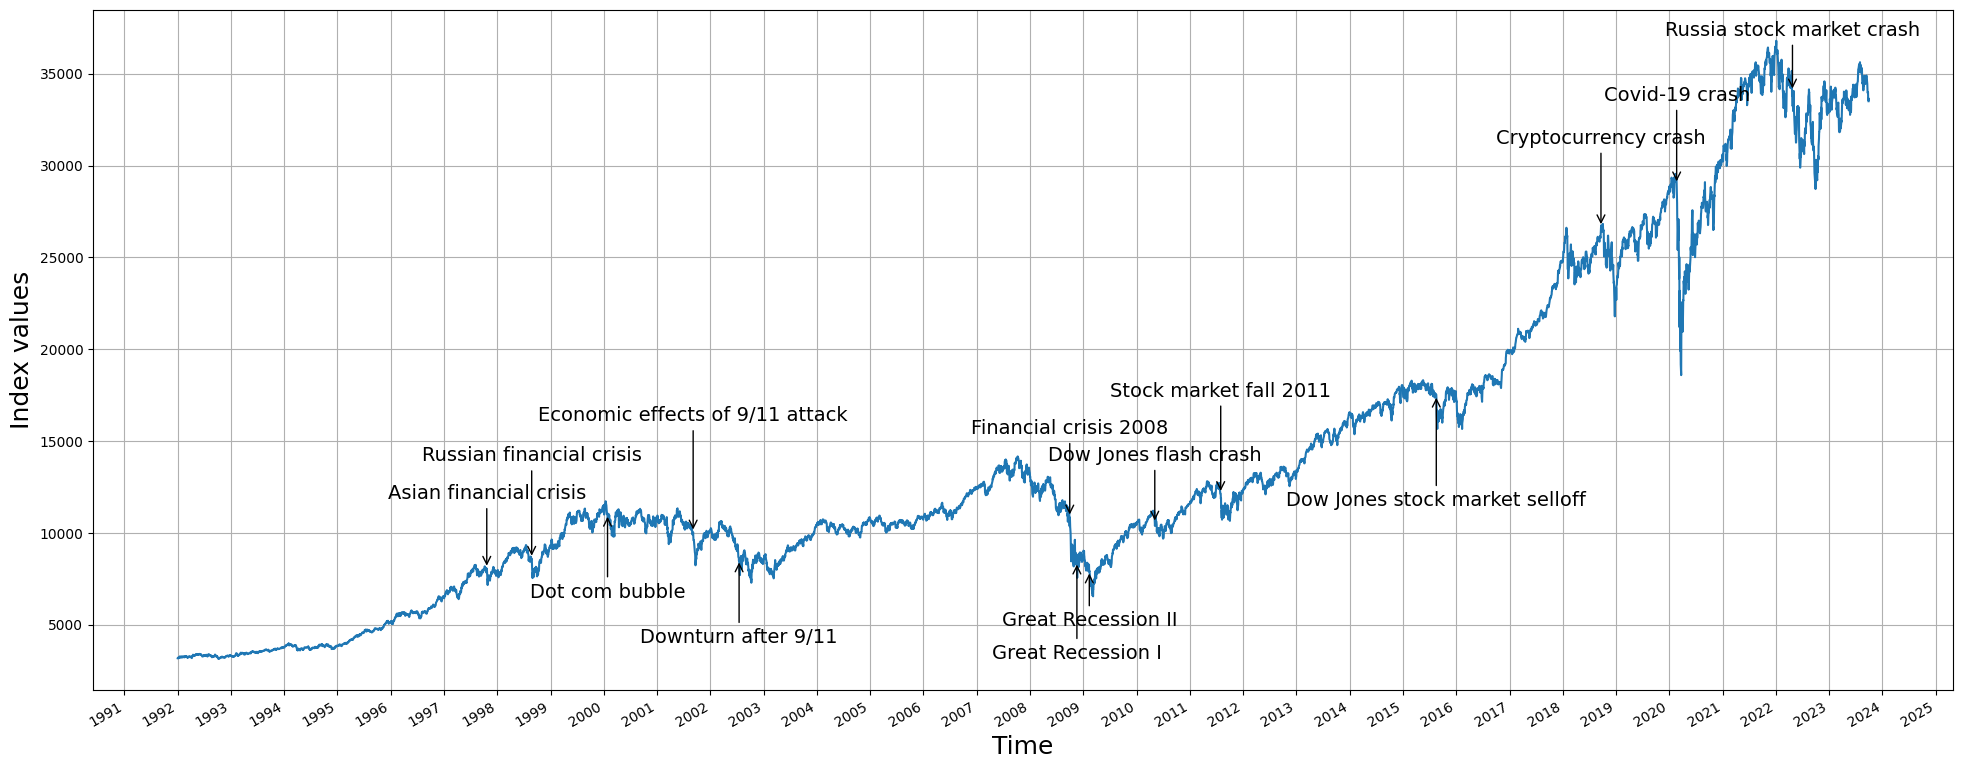

In [55]:
# Plot the DJI

dji = data["Close"]

x = dji.index
plt.figure(figsize = (24,10))
plt.plot(x, dji)

annotations = [
    {'date': datetime(1997, 10, 21), 'label': 'Asian financial crisis', 'distance': (0, 50)},
    {'date': datetime(1998, 8, 25), 'label': 'Russian financial crisis', 'distance': (0, 70)},
    {'date': datetime(2000, 1, 27), 'label': 'Dot com bubble', 'distance': (0, -60)},
    {'date': datetime(2001, 9, 5), 'label': 'Economic effects of 9/11 attack', 'distance': (0, 80)},
    {'date': datetime(2002, 7, 17), 'label': 'Downturn after 9/11', 'distance': (0, -60)},
    {'date': datetime(2008, 9, 30), 'label': 'Financial crisis 2008', 'distance': (0, 60)},
    {'date': datetime(2008, 11, 18), 'label': 'Great Recession I', 'distance': (0, -70)},
    {'date': datetime(2009, 2, 11), 'label': 'Great Recession II', 'distance': (0, -40)},
    {'date': datetime(2010, 5, 6), 'label': 'Dow Jones flash crash', 'distance': (0, 45)},
    {'date': datetime(2011, 8, 1), 'label': 'Stock market fall 2011', 'distance': (0, 70)},
    {'date': datetime(2015, 8, 18), 'label': 'Dow Jones stock market selloff', 'distance': (0, -80)},
    {'date': datetime(2018, 9, 20), 'label': 'Cryptocurrency crash', 'distance': (0, 60)},
    {'date': datetime(2020, 2, 21), 'label': 'Covid-19 crash', 'distance': (0, 60)},
    {'date': datetime(2022, 4, 25), 'label': 'Russia stock market crash', 'distance': (0, 40)}
]
for annotation in annotations:
    date = annotation['date']
    label = annotation['label']
    distance = annotation['distance']
    plt.annotate(label, (date, dji.loc[date]), xytext= distance, textcoords="offset points", ha='center', arrowprops=dict(arrowstyle='->'), size = 14)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()
plt.xlabel('Time', fontsize=18)
plt.ylabel('Index values', fontsize=18)
plt.grid(True)

#plt.title('DJI colored wrt. risk label')
plt.show()

In [56]:
# Clean up missing values

result = result.fillna(0) # This replaces the nan values with 0
paths = result.to_numpy()

In [57]:
# This function can be used for synthetic examples generating paths with Geometric Brownian Motion

def Paths_to_Index(paths):
    l = len(paths)
    index_path = np.zeros(l, np.float64)
    for t in range(0,l):
        index_path[t]= sum(paths[t])
    return index_path


# Part 2: calculating drawdowns and crashes

In [58]:
'''
calculate_drawdowns:
====================
Input: -index_path: (1, M+1) array. The sum of all assets.
       - epsilon: float. The minimum size of drawdown that an interrupting
                    peak must have.
Output: - Drawdowns: (1,M) array. An array with zeroes on places where
                  the derivative of index_path is in the same direction,
                  and the value of the drawdown at times when there is
                  a local peak/extremum in index_path.

'''
def calculate_drawdowns(index_path, epsilon, negative):

    extrema= np.diff(np.sign(np.diff(index_path))) #First calculate first derivative,
                                                   # then see if it is positive or negative
                                                   # based on that, decide whether it is a local max or a min

    l = len(extrema)
    Drawdowns = np.zeros(l+2)
    Rmax = index_path[0]
    Rmin = index_path[0]+1
    index_of_peaks = [0]*(l+2)
    for i in range(l):

        if extrema[i] == -2:
            # Here, we ignore the local maximum if it indicates
            # only a small peak inside a big drawdown
            if abs((Rmin- index_path[i+1])/Rmin) >= epsilon:
                Rmax= index_path[i+1]
                index_of_peaks[i+1] = i+1

        if extrema[i] == 2:
            Rmin = index_path[i+1]
            if negative == True:
              Drawdowns[i] = (Rmin-Rmax)/Rmin
            elif negative == False:
              Drawdowns[i] = abs((Rmin-Rmax)/Rmin)
        else:
            Drawdowns[i] = 0

    return Drawdowns, index_of_peaks


Text(0, 0.5, 'volume of drawdowns')

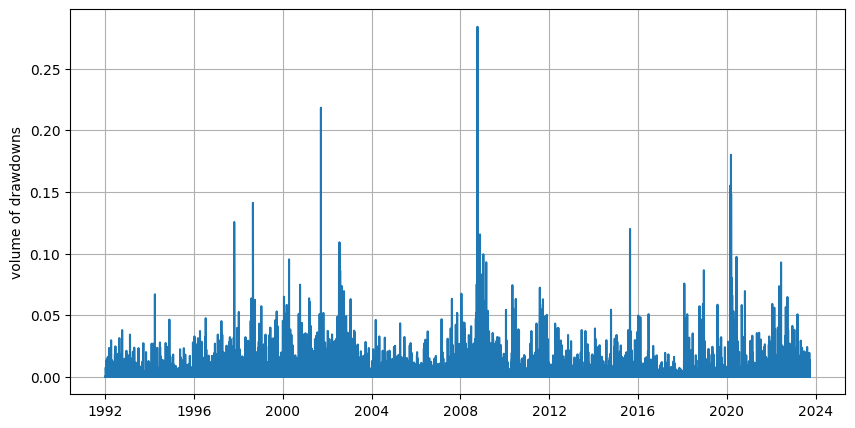

In [59]:
observed_drawdowns, ind = calculate_drawdowns(dji, 0, False)

# Plotting the drawdowns

plt.figure(figsize=(10,5))
plt.plot(dji.index, observed_drawdowns)
plt.grid(True)
#plt.xlabel('time steps')
plt.ylabel('volume of drawdowns')

Below, I write code that gives the crashes and their time occurrences accprding to a Generalized Extreme Value Distribution.

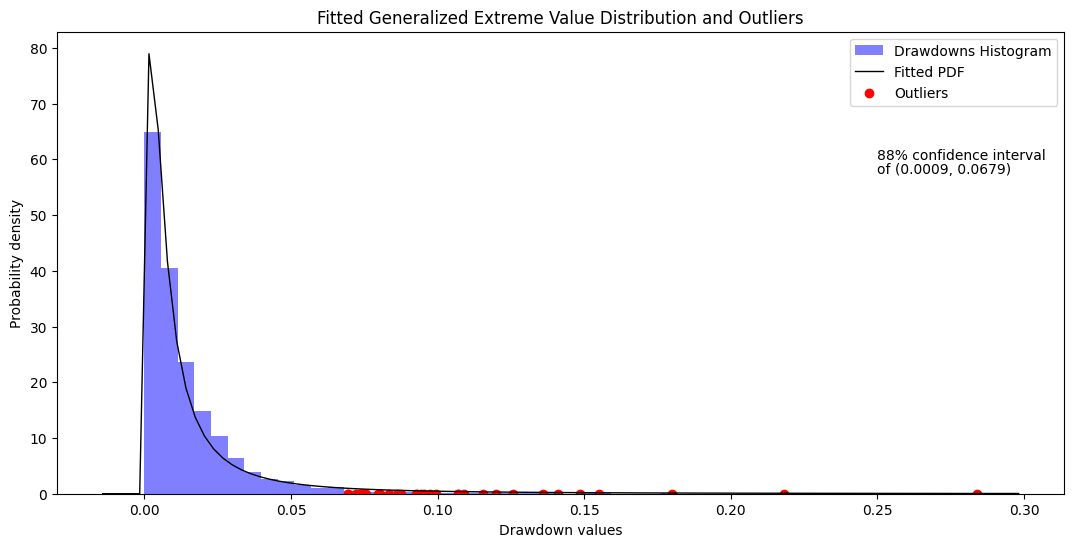

parameters: (-0.820356919288912, 0.0050260213898770684, 0.005862903591832506)
confidence interval (0.0009382420941979903, 0.06794349374369457)
Outliers: [0.1255655  0.14107583 0.09521953 0.07473162 0.21824933 0.10697248
 0.10907603 0.08615015 0.07353831 0.06950846 0.07502614 0.28392092
 0.09439364 0.0875926  0.10688968 0.07982332 0.11552257 0.08343879
 0.09938367 0.0929108  0.07431295 0.07228596 0.11992126 0.07561734
 0.08642732 0.15500863 0.13583653 0.18006743 0.14845564 0.08042521
 0.09727209 0.06952166 0.07345527 0.09271616]
Crashes at t: [(array([1471]),), (array([1683]),), (array([2093]),), (array([2218]),), (array([2451]),), (array([2655]),), (array([2660]),), (array([2669]),), (array([2689]),), (array([2713]),), (array([4218]),), (array([4227]),), (array([4230]),), (array([4235]),), (array([4246]),), (array([4250]),), (array([4256]),), (array([4262]),), (array([4292]),), (array([4324]),), (array([4622]),), (array([4934]),), (array([5956]),), (array([6572]),), (array([6795]),), (

In [60]:
'''
Crashes with Extreme Value Theory
=======
Input:
- Drawdowns: a list whith values of drawdowns at the times of extrema,
and zeroes on other time points
- q: float, percentage of all drawdowns that is considered 'normal'

Output:
- outliers: 1-d array of zeroes on places where no crash happens
and a 1 on places where a crash does happen

'''
# Calculate the drawdowns in the DJI
drawdowns, ind = calculate_drawdowns(dji, 0, False)
drawdowns_temp = drawdowns[drawdowns>0]
def crashes_with_evt(drawdowns: list, threshold: float):

  # Fit the generalized extreme value distribution to the data
  params = genextreme.fit(drawdowns_temp)


  # Calculate the probability density function (pdf) for the fitted distribution
  pdf_values = genextreme.pdf(drawdowns_temp, *params)
  conf_interval = genextreme.interval(0.88, *params)

  # Identify outliers based on the threshold
  outliers = drawdowns_temp[pdf_values < threshold]
  # Identify the indices corresponding to the outliers
  crashes = []
  for outlier in outliers:
    crashes.append(np.where(drawdowns == outlier))

  # Plot the resulting pdf
  plt.figure(figsize=(13, 6))
  plt.hist(drawdowns_temp, bins=50, density=True, alpha=0.5, color='blue', label='Drawdowns Histogram')

  # Plot the fitted PDF
  xmin, xmax = plt.xlim()
  x = np.linspace(xmin, xmax, 100)
  pdf = genextreme.pdf(x, *params)
  plt.text(0.25, 60, '88% confidence interval', fontsize = 10)
  plt.text(0.25, 57.5, 'of (0.0009, 0.0679)', fontsize = 10)

  plt.plot(x, pdf, 'k', linewidth=1, label='Fitted PDF')

  # Highlight the identified outliers
  plt.scatter(outliers, np.zeros_like(outliers), color='red', label='Outliers')

  plt.title('Fitted Generalized Extreme Value Distribution and Outliers')
  plt.xlabel('Drawdown values')
  plt.ylabel('Probability density')

  plt.legend()
  plt.show()
  #crashes = [drawdowns.index(t) for t, r in zip(drawdowns,outliers) if t == r]
  #crashes = np.where(pdf_values < threshold)
  return outliers, crashes, params, conf_interval

outliers, crashes, params, conf_interval = crashes_with_evt(drawdowns, 1) #sweet spots: 0.38, 0.7, 1
print('parameters:', params)
print('confidence interval', conf_interval)
print("Outliers:", outliers)
print("Crashes at t:", crashes)

# This displays the dates where the drawdown was at its steapest
for crash in crashes:
  print(dji.index[crash][0])


In [61]:
#Below, I calculate in which time windows the crashes occur
# For this, I have looked up which time stamp corresponds to the dates that are output by the EVT procedure,
# and those values converted to the window number
# Note that the first 1445 are not recorded by the dji

crash_times = [1471, 1683, 2091, 2451, 2660, 4227, 4256, 4287, 4619, 4934, 5956, 6571, 7091, 7642]
crash_windows = []
for c in crash_times:
  windownumber = round((1445+ c-100)/40)
  crash_windows.append(windownumber)

In [62]:
'''
The below functions will calculate the transition probabilities using softmax based on the final Qvalues
and the probability on entering the highest risk level (the crash level) respectively
'''
def transition_probabilites(Qvalues: list) -> list:
    probabilities = np.zeros(np.shape(Qvalues))
    for table in range(len(Qvalues)):
      for row in range(len(Qvalues[table])):
          probabilities[table][row] = np.exp(Qvalues[table,row]) / sum(np.exp(Qvalues[table,row]))
    return probabilities

'''
probability on highest level:
=============================
Input:
- k: (int) number of time steps prior to a crash,
- state: (int) current state
- i: (int) total number of states/clusters
- Qvalues: (list of lists) table of Qvalues

Output:
- p: (float) probability
'''

def probability_on_highest_level(k: int, state: tuple, i: int, Qvalues: list) -> float: # Make sure k is not too big (it represents 10 days already)
                                                                      # and it will make the number of options too spit through
                                                                      # very large
    L = len(Qvalues)
    # 'product' is the Cartesian product between the states
    options = np.array(list(product(range(i), repeat = k+1))) # range(i) is the state space (number of clusters)
    possible_paths = list(filter(lambda y: all(abs(np.diff(y)) <= 1) and y[0]== state[1] and y[-1] == i-1, options)) # <=1 will give -1, 0 or 1
    #possible_paths = list(filter(lambda x: x[0] == state and x[-1] == i-1 and (np.prod(np.diff(x)) == 1 or np.prod(np.diff(x)) == -1 or np.prod(np.diff(x)) == 0), options))

    P = transition_probabilites(Qvalues)

    #print(possible_paths)
    steps = np.diff(possible_paths)
    p = 0
    for m in range(len(possible_paths)): #The last transition (into stop) is not needed
        # Initialize/reset the probability for one particular path happening
        one_p = 1
        for n in range(k): # is equal to range(len(possible_paths[m]))
            one_p = one_p*P[state[0]+n][possible_paths[m][n]][steps[m][n]+1] # The column index must be +1 because of the scaling of the actions
            #one_p = one_p*P[possible_paths[m][n]][steps[m][n]+1] # The column index must be +1 because of the scaling of the actions
            #print('being in state', state[0]+n, possible_paths[m][n], 'and taking action', steps[m][n]+1, 'has probability', P[state[0]+n][possible_paths[m][n]][steps[m][n]+1])
        p += one_p

    return p

In [63]:
# This function can be used if the model is allowed to jump two steps at a time

def probability_on_highest_level_with_jumps(k: int, state: tuple, i: int, Qvalues: list) -> float: # Make sure k is not too big (it represents 10 days already)
                                                                      # and it will make the number of options too spit through
                                                                      # very large
    L = len(Qvalues)
    # 'product' is the Cartesian product between the states
    options = np.array(list(product(range(i), repeat = k+1))) # range(i) is the state space (number of clusters)
    possible_paths = list(filter(lambda y: all(abs(np.diff(y)) <= 2) and y[0]== state[1] and y[-1] == i-1, options)) # <=1 will give -1, 0 or 1
    #possible_paths = list(filter(lambda x: x[0] == state and x[-1] == i-1 and (np.prod(np.diff(x)) == 1 or np.prod(np.diff(x)) == -1 or np.prod(np.diff(x)) == 0), options))
    #print(possible_paths)
    P = transition_probabilites(Qvalues)

    #print(possible_paths)
    steps = np.diff(possible_paths)
    p = 0
    for m in range(len(possible_paths)): #The last transition (into stop) is not needed
        # Initialize/reset the probability for one particular path happening
        one_p = 1
        for n in range(k): # is equal to range(len(possible_paths[m]))
            one_p = one_p*P[state[0]+n][possible_paths[m][n]][steps[m][n]+1] # The column index must be +1 because of the scaling of the actions
            #one_p = one_p*P[possible_paths[m][n]][steps[m][n]+1] # The column index must be +1 because of the scaling of the actions
            #print('being in state', state[0]+n, possible_paths[m][n], 'and taking action', steps[m][n]+1, 'has probability', P[state[0]+n][possible_paths[m][n]][steps[m][n]+1])
        p += one_p

    return p

# Part 3: Transforming sequence of returns into sequence of risk levels

In [64]:
# Get near positive definite matrix

def get_near_pd(A):

    B = A.copy()
    eigval, eigvec = np.linalg.eig(A)
    tol = 1e-4    # The smaller the better convergence, but it may take longer (or never reach that point!)
    eigval_old = eigval + 10 * tol # Such that it always enters the loop
    n = eigval.sum()

    while ( np.mean(np.abs(eigval - eigval_old)) >= tol ): # While the mean of the improvement on the eigenvalues bigger is than some small number
      eigval_old = eigval
      eigval, eigvec = np.linalg.eig(B)
      eigval[eigval < 0] = 0.0001
      eigval *= n / eigval.sum()  # sum of eigvals must be equal to n
                                  # So make eigenvalues sum up to N, and then contruct matrix again
      B = eigvec.dot(np.diag(eigval)).dot(eigvec.T)
      np.fill_diagonal(B, 1)   # diagonal must be 1 for correlation matrices

    return B

In [65]:
# Abstract the correlation matrices

def generate_correlation_matrices(paths, windowsize, step):

    #generate new correlation matrix every 10 days for a number of assets
    M = paths.shape[0]
    N = paths.shape[1]
    list_of_matrices = []
    list_of_dates = []
    num_steps = int((M-windowsize)/step)
    for i in range(num_steps+1):
        window = paths[i*step:i*step + windowsize, :42]
        correlation_mat = np.corrcoef(paths[i*step:i*step + windowsize, :N], rowvar= False) #This is Pearson correlation
        get_near_pd(correlation_mat) # Make sure the matrix is positive definite
        #sns.heatmap(correlation_mat, annot = True)
        #print(i, np.linalg.eigvals(correlation_mat))
        #print(i, np.trace(correlation_mat))
        list_of_matrices.append(correlation_mat)
        list_of_dates.append(df.index[i*step])

    return list_of_matrices, list_of_dates


In [66]:
list_of_matrices, list_of_dates = generate_correlation_matrices(paths, 100, 40)

Below, the Quantum Majorization comparisons of the correlation matrices are performed

In [67]:
# from Graph_visualization import *

def get_vectors_of_eigenvalues(matrices):
    vectors_of_eigenvalues = []
    for matrix in matrices:
        eigval = np.linalg.eigvalsh(matrix)
        eigval  = np.sort(eigval)[::-1]
        vectors_of_eigenvalues.append(eigval)
    return vectors_of_eigenvalues

def LorenzMajorization(v_1, v_2):
    comparison = np.cumsum(v_1) >= np.cumsum(v_2)
    return comparison[:-1].all() #returns True if all elements in the cumsum arrays suffice to the comparison


def QuantumMajorizationGraph(X: np.array): # X = list of sets of eigenvalues
    l = len(X)
    node_names = [str(i) for i in range(l)]
    degrees = np.zeros(l)
    Graph = np.zeros((l,l), dtype=bool)
    for i in range(l):
        X[i] = np.sort(np.array(X[i]))[::-1] # Sort and place in reversed order for
                                             # preparing the Lorenz comparison

    for i in range(l):
        for j in range(l):
            if LorenzMajorization(X[i],X[j]) == True:
                #print('does {} majorize {}?'.format(i,j), LorenzMajorization(X[i],X[j]))
                Graph[i,j] = True # row i majorizes row j

                if not i == j: # don't count an edge from the node to itself
                    degrees[i] +=1
                    degrees[j] -= 1

    degree_measure = 0.5 + (degrees)/(2*l)
    # For visualization of the graph, this requires the Graph_visualization.py file
    #d = graph_to_graphviz(Graph, node_names)
    #d.view()
    return 'd.view()', X, Graph, degree_measure, degrees # must be final line of code block to be displayed

'''
for i in range(len(list_of_eig)):
  vectors_of_eig[i] = np.sort(vectors_of_eig[i])[::-1]
  print("Cumulative sum of matrix {}: ".format(i), np.cumsum(vectors_of_eig[i]))
'''

vectors_of_eig = get_vectors_of_eigenvalues(list_of_matrices)
d, X, qmg, degm, deg = QuantumMajorizationGraph(vectors_of_eig)
#d


In [68]:
# Average degree measure

def DegreePerDay(deg: np.array, windowsize: int, step: int, T: int)-> np.array:
  print(len(deg))
  l = len(deg)
  M = l*step + windowsize #Total number of days
  print(M)
  overlap = windowsize/step
  print(overlap)
  time_that_nothing_happens = step / floor(overlap)
  matrix_number = -1
  av_deg = 0
  degree_per_day = np.zeros(T)
  divisor = 0 # this will update to 1 when we enter the loop
  sum = 0
  for t in range(M-windowsize):

    if t % step == 0 and t <= M-windowsize and divisor <= overlap:
      matrix_number +=1
      if divisor < overlap:
        divisor +=1
      else:
        pass
      sum += deg[int(t/step)]
      if windowsize % step == 0 and int(t/step-floor(overlap))>= 0: #The oldest matrix does not contain t anymore
        sum -= deg[int(t/step-floor(overlap))]
      av_deg = sum/divisor

    elif windowsize % step == 0: # If the matrices fall exactly nice into the windows, there are time steps in which nothing happens with the av_deg
      pass

    else:
      if t% step == 20: #For now I hardcode this, but figure out the general rule still!!
        if (t <= M-windowsize and divisor >= ceil(overlap)): #The oldest matrix does not contain t anymore
          divisor -= 1
          sum -= deg[int(t/step-floor(overlap))]
          av_deg = sum/divisor
    degree_per_day[t] = av_deg

  for t in range(M-windowsize, T): # Fill the last zeros
    if (t% step == 20 or windowsize % step == 0) and t< M-step: # or windowsize % step == 0:
      #if l - int(t/step-ceil(overlap))> 0: #brute force dat index niet out of range gaat
      sum -= deg[int(t/step-ceil(overlap))]
      if divisor > 1:
        divisor -= 1
      av_deg = sum/divisor
    degree_per_day[t] = av_deg
  degree_per_day[t:M] = av_deg #The last days, the degree is the same

  return degree_per_day


dpd = DegreePerDay(degm, 100, 40, T)
print(len(dpd))
print(np.where(dpd == np.inf))
print(dpd)





234
9460
2.5
9441
(array([], dtype=int64),)
[0.39957265 0.39957265 0.39957265 ... 0.32478632 0.32478632 0.32478632]


In [69]:
'''
Below, I use some code from stackexchange to be able to sort the found clusters, which it doesn't do automatically,
as KMeans is used more often with multidimensional data.
For me it is super convenient to have sorted cluster centers considering that my cluster labels actually represent risk levels.

I found the code below on:
https://stackoverflow.com/questions/44888415/how-to-set-k-means-clustering-labels-from-highest-to-lowest-with-python/64259273#64259273?newreg=eed568ce011f40db9576a8f783912750

'''

def sorted_cluster(x, model=None):
    if model == None:
        model = KMeans()
    model = sorted_cluster_centers_(model, x)
    model = sorted_labels_(model, x)
    return model

def sorted_cluster_centers_(model, x):
    model.fit(x)
    new_centroids = []
    magnitude = []
    for center in model.cluster_centers_:
        magnitude.append(np.sqrt(center.dot(center)))
    idx_argsort = np.argsort(magnitude)
    model.cluster_centers_ = model.cluster_centers_[idx_argsort]
    return model

def sorted_labels_(sorted_model, x):
    sorted_model.labels_ = sorted_model.predict(x)
    return sorted_model


data = np.reshape(dpd, (-1,1))
test_data = np.reshape(degm, (-1,1))
#test_data = np.reshape(np.array([0,0,0,0,0, 0.5,0.5,0.5,0.5,0.5,1,1,1,1,1]),(-1,1) )
kmeans = KMeans(n_clusters=3, init='k-means++', n_init = 10, random_state = 1000)
kmeans = sorted_cluster(test_data , kmeans)
print(kmeans.cluster_centers_)
labels = kmeans.labels_


[[0.30038342]
 [0.55945199]
 [0.79349558]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


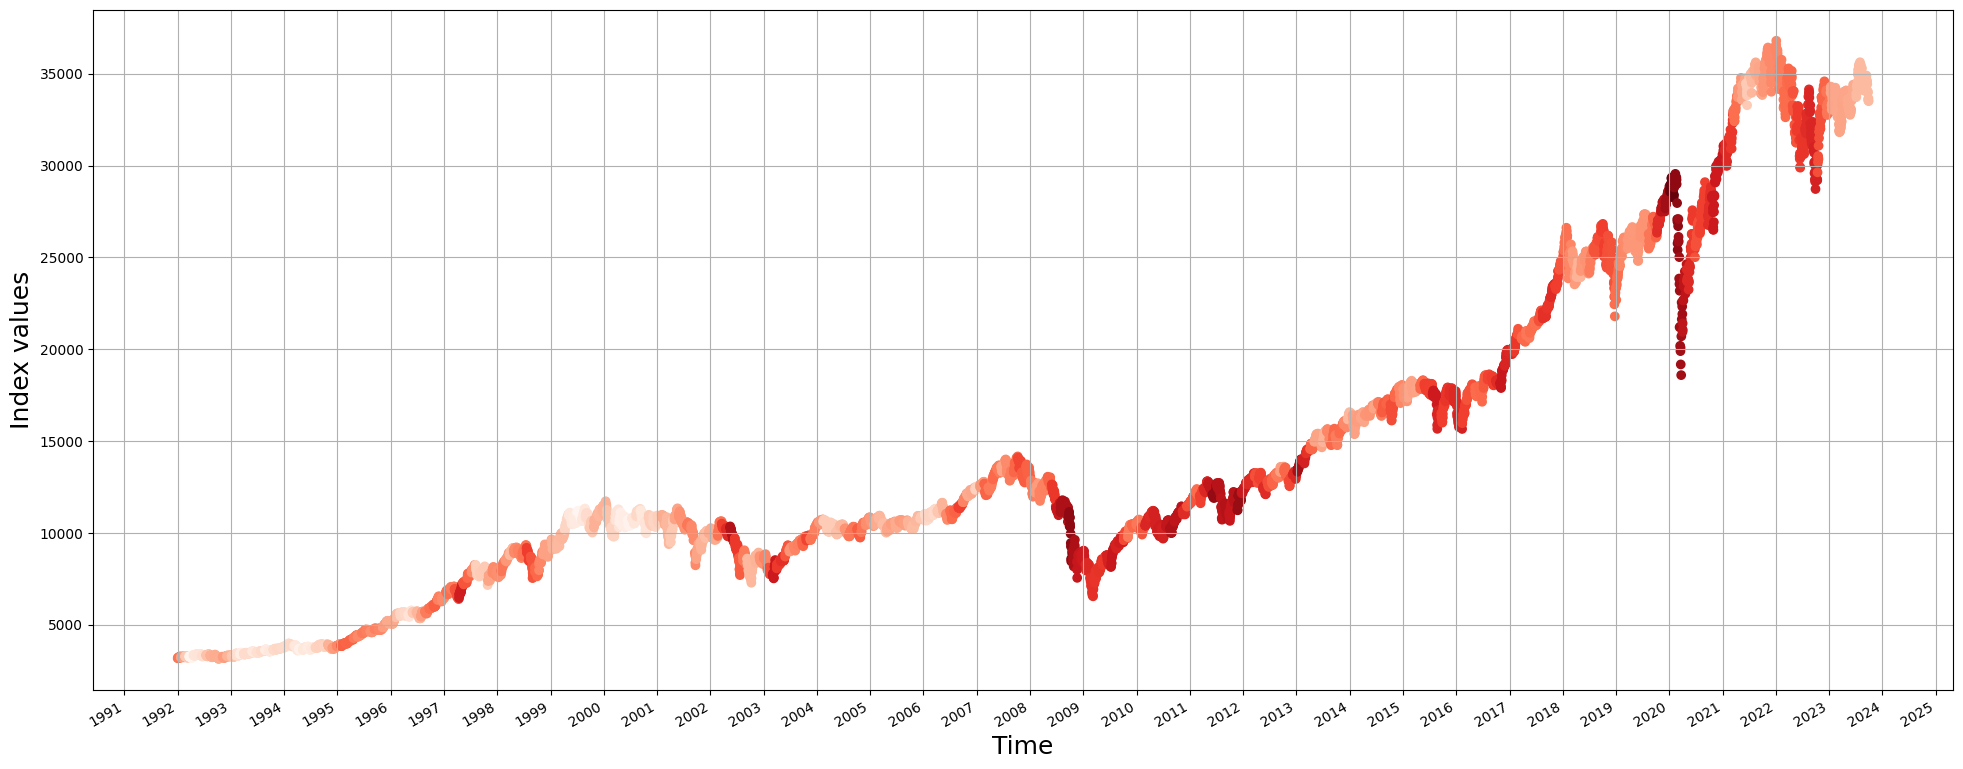

In [70]:
# Plotting the average in-out degree per day over the DJI

#len(dpd)-len(dji) = 9441-7996 = 1445
short_dpd = dpd[1445:] #short dpd is the dpd without data before 1-2-1991

#x = np.arange(start, end, timedelta(days=252)).astype(datetime)
x = dji.index
plt.figure(figsize = (24,10))
#plt.scatter( result.index, index_path, c= dpd, cmap='Reds')
plt.scatter(x, dji, c= short_dpd, cmap='Reds', label = 'Risk level')

plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
plt.gcf().autofmt_xdate()
plt.xlabel('Time', fontsize=18)
plt.ylabel('Index values', fontsize=18)
plt.grid(True)
#plt.legend()


#plt.title('DJI colored wrt. risk label')
plt.show()


# Part 4: Learning the market behavior

In [71]:
!pip install gymnasium

In [72]:
# Some additional imports

import gymnasium as gym
from gymnasium import spaces
from gym.utils import seeding

In [73]:
crash_windows = [70, 76, 86, 95, 100, 139, 140, 141, 149, 157, 183, 198, 211, 225] # Determined in Part 2 of this file

# Some initial values
i = 3 # Number of states
      # Remeber to adjust the number of clusters first, if adjusting this
j = 3 # Number of actions
      # Remember to adjust action space and agent.select_action and agent.update_Qvalues, if adjusting this

alpha, gamma, epsilon = 0.1, 0.8, 0.1 #before: 0.35,0.85,0.3, before: 0.1,0.8,0.1
max_cycle_length = 41 # Looking at the crashes, the biggest cycle consists of 40 time steps
extreme_reward = 1 # Adjust if you want to experiment with asymmetric rewards
time_series_length = 69  # Length of the considered time period. In total we have 200 matrices:
                         #Training value = 131
                         #For test_period: 69
time_start = 165# For training period, start at 34 (this is january 1992). For test_period, start at 165 (this is june 2012)
                # So let's start in 1992 as opposed to 1986, this would be matrix 33.625, so 34


'''
We want to Sample new values/returns from the index each x days.
'''

class SamplingTheta:
    def __init__(self):
        self.theta = degm
        self.path_history = paths
        self.timetracker = time_start
        self.vectors_of_eigenvalues = vectors_of_eig # Note that these vectors of eigenvalues are already sorted
        self.graph = qmg
        self.degrees = deg

    def new_information(self):

        theta = self.theta[self.timetracker]
        degrees = self.degrees
        graph = self.graph

        # For the online method: Add the new paths and the newly calculated eigenvalues to the history for book keeping
        #self.path_history = np.vstack((self.path_history, new_paths))

        self.timetracker += 1

        return theta, self.path_history, self.vectors_of_eigenvalues, graph, degrees


    '''
    The marble function gives the 'riskiness' level of the newly sampled correlation matrix
    ======================
    Input:
    - theta: (array) sequence of the in-out degree measures of previous time steps

    Output:
    - label: riskiness level
    '''
    def marble(self, theta, t1, t2):
        # Classify to which cluster this theta belongs
        label = kmeans.predict(np.array(theta).reshape(1,-1))

        '''
        # Use the below code if you want to experiment with different cluster thresholds
        if theta < t1:
          label = [0]
        if theta >= t1 and theta < t2:
          label = [1]
        if theta > t2:
          label = [2]
        '''
        return label

"""
Below we will specify the Reinforcement Learning environment
"""

class Environment(gym.Env):
    metadata = {'render.modes': ['human', 'rgba_array']}

    def __init__(self):
        # The actions consist of moving left, staying in current state, or moving right
        self.action_space = spaces.Discrete(j, start=-2)  # {-1, 0, 1}

        # The observation space below indicates a continuous interval of risk levels;
        # self.observation_space = spaces.Box(low= np.array([0], high = np.array([100]))) #This will also be 3..?
        # We might just want to start with only 3 states:
        self.observation_space = spaces.Discrete(i-1)
        self.state = (0,0)
        # We might want to also specify the time instant where we are at
        self.time = 0

        self.theta = 0 # temporarily
        self.counts = 0 # For calculating an accuracy score

    def seed(self, seed=None):
        rng, np_seed = seeding.np_random(seed)
        return rng, np_seed

    def is_valid_action(self, state, action): #Note that state[1] refers to the risk level instance of the state, neglecting the time part of the state
        if state[1] + action >= 0 and state[1]+action <= i-1:  #The agent cannot go lower than 0 or higher than crash level
          #print('valid action!')
          return True
        else:
          #print('not valid!')
          return False

    def step(self, action, theta):
        # Apply action
        self.state = tuple(map(sum, zip(self.state, (1,action)))) # in this line, I add 1 to the time instance of the state, and the action to the risk level
        # Increase duration of episode by one
        self.time += 1

        # Calculate the reward; I chose to define the reward to be linear to how far off the agent is from the real risk level
        if self.state[1] == i-1 and theta[0] == i-1:
          reward = extreme_reward
          self.counts +=1 # We count the correct estimates for an accuracy score later
          done = False # This 'done' variable could be used if we want to terminate an episode each time we hit a crash level
        elif self.state[1] == theta[0]:
          reward = 1
          self.counts +=1 # We count the correct estimates for an accuracy score later
          done = False

        else:
          reward = 1-2*abs(self.state[1] - theta[0])
          done = False
        #'''
        info = {}
        return self.state, self.time, self.counts, reward, done, info


    def render(self):
        # Implement visualization
        pass

    def reset(self):
        self.state = (0,0)
        return self.state

"""
Below we will specify the (Q-learning) agent
"""
class QAgent():
    def __init__(self, alpha: float, gamma: float, epsilon: float, Qvalues: np.array):
        self.alpha = alpha  # learning rate or step size
        self.gamma = gamma  # discount rate
        self.epsilon = epsilon  # exploration rate
        self.Qvalues = Qvalues
        for l in range(len(self.Qvalues)):
          self.Qvalues[l,0,0] = float('-inf')
          self.Qvalues[l,-1,-1] = float('-inf')
        #self.Qvalues = np.zeros((i, j)) # i states and each state has j actions;
                                         # although the lowest state and highest state actually have only two actions

    def select_action(self, state: tuple) -> int:
      # The behavior policy is in Q-learning usually according to epsilon-greedy
      # In epsilon percent of the cases: select randomly

      if self.epsilon > np.random.uniform(0, 1):
        #action = env.action_space.sample() #utils.np_random?
        action = np.random.choice(j)-1
        #print('The agent is now exploring')
        return action
      # In 1 - epsilon of the cases: select the action with the highest Q value
      else:
        action = np.random.choice(np.where(self.Qvalues[state] == self.Qvalues[state].max())[0]) - 1 # Note that -1 or -2 only works because our actions are the states -1
        return action

    def update_Qvalues(self, action: int, state: tuple, next_state: tuple, reward: float)-> np.array:

        #max_Q = np.max(self.possible_values(next_state))
        max_Q = np.max(self.Qvalues[next_state])

        # Q-learning update rule:

        # I perform 'action+1' to give a fitting index corresponding to the action
        #print('Q[{}{}]'.format(state, action+1), self.Qvalues[state, action + 1],', alpha', self.alpha, ', reward', reward, ', gamma', self.gamma, ', maxQ', max_Q)
        self.Qvalues[state][action + 1] = self.Qvalues[state][ action + 1] + self.alpha * (reward + (self.gamma * max_Q) - self.Qvalues[state][action+1])
        return self.Qvalues

    def reset_Qvalues(self, initial_Q):
        Q = initial_Q.copy()
        self.Qvalues = Q
        for l in range(len(self.Qvalues)):
          self.Qvalues[l,0,0] = float('-inf')
          self.Qvalues[l,-1,-1] = float('-inf')
        return self.Qvalues

env = Environment()
#env.seed(seed)
sam = SamplingTheta()

'''
Run Episodes
=============
Input:
- episodes: int, number of episodes to play
- (optional, i: int, number of risk levels, equivalent to number of states)
Output:
- agent.Qvalues: the state action value table. The rows correspond to the states,
and the columns correspond to the actions -1

'''
from time import time
ep_times = []


def RunEpisodes(episodes: int, agent: QAgent, seed: int, time_series_length: int, time_start: int, t1, t2):
    average_reward_per_episode = []
    sampled_thetas = []
    list_of_states = []
    list_of_p = []
    prediction = []
    Returns = []
    Accuracies = []
    for episode in range(1, episodes+1):
        np.random.seed(seed)
        ep_start = time()
        env.time = 0
        sam.timetracker = time_start
        done = False
        Return = 0
        Total_steps = 0
        # Reset the counts after all episodes have run
        env.counts = 0
        sampled_thetas.clear()
        list_of_states.clear()
        list_of_p.clear()
        while env.time < time_series_length-1: # Updating Q-values of the last time step would require info from a matrix that does not exist.
            done = False
            while env.state[0] <= np.shape(agent.Qvalues)[0]-2 and done == False and env.time < time_series_length-1: #This choice is because I cannot use information from the last
                                                                                                                      #Qvalues that will never be updated
              #env.render()

              # Determine previous state and which action to take
              state = env.state

              # Observe to which risk level the market went/ sample a marble
              theta, path_history, vectors_of_eigenvalues, graph, degrees = sam.new_information() # sam.timetracker is nu 1 omhoog
              label = sam.marble(theta, t1, t2)

              # Cast a probability of entering crash level with new Q-values (first value is k: number of time windows to be in advance of the crash)
              if episode == episodes: # For the very last prediction, it would need values from outside the Q-value range.
                                      # Either exclude the last prediction, or let the last Q-values be random

                imaginary_state = (env.state[0],label[0]) #Look where the market is and decide what the p is on a crash according to Qvalues
                #print('Action values of state', imaginary_state, 'are', agent.Qvalues[imaginary_state])
                #print('RL state', env.state, 'Market state', imaginary_state, 'p:', probability_on_highest_level(1, imaginary_state, i, agent.Qvalues))
                list_of_p.append(probability_on_highest_level(1, imaginary_state, i, agent.Qvalues))

              #print('The current state is', state)
              action = agent.select_action(state)

              while not env.is_valid_action(state, action): #Check if the action is valid
                  action = agent.select_action(state)
                  #print('action', action, 'is valid? when current state is', state, env.is_valid_action(state,action))

              # Determine next state
              next_state, n_time, counts, reward, done, info = env.step(action, label) #Now env.state is een omhoog gegaan in tijd
              sampled_thetas.append(label[0])

              list_of_states.append(env.state[1])
              # Determine reward
              #print('The new state is', next_state, 'and the actual market went to state ', label[0], ' -> Reward: ', reward)
              Return += reward

              # Update the agent's Qvalues
              # Only update the q-values if it is not the very last step
              agent.update_Qvalues(action, state, next_state, reward)
              #print(agent.Qvalues[env.state[0]])

              for crash in crash_windows:
                if sam.timetracker == crash+1: # The agent has ended up in the crash, so we reset in the next time step
                  done = True
                  #rint('Epsiode:', episode, 'env.time:', env.time, 'sam.timetracker', sam.timetracker, 'The market has a crash. Last state:', env.state)
                  #print('market state', label[0])

            env.reset()

        #print('Final Q-values of episode {}'.format(episode), agent.Qvalues)
        # Report the total reward per episode and total steps of this episode
        average_reward_of_episode = Return / env.time
        average_reward_per_episode.append(average_reward_of_episode)
        Returns.append(Return)
        #print('Episode:{} TotalReward:{} AverageReward: {}'.format(episode, Return, average_reward_of_episode))
        Total_steps += n_time
        ep_end = time()
        ep_time = ep_end - ep_start
        ep_times.append(ep_time)
        accuracy = counts / (time_series_length -1)
        #print('The accuracy on the predicted risk levels is in episode {} '.format(episode), accuracy)
        #print('The Qvalues after episode {}'.format(episode), agent.Qvalues)


    # Report the final values, this we will actually return
    #print('Final Qvalues: ', agent.Qvalues)
    final_Qvalues = agent.Qvalues

    return final_Qvalues, average_reward_per_episode, Returns, list_of_states, sampled_thetas, list_of_p, accuracy




In [74]:
# Example agent

agent = QAgent(alpha, gamma, epsilon, np.zeros((max_cycle_length, i, j)))
agent.reset_Qvalues(np.zeros((max_cycle_length, i, j)))
finaltraining_Qvalues, average_reward_per_episode, Returns, visited_states, thetas, p, accuracy = RunEpisodes(100, agent, 0, 131, 34, 0.43, 0.675)
#print(finaltraining_Qvalues[100:150])

In [75]:
# Learn Q-values for 10 different random seeds, walking 100 episodes

def Results_reduced_randomness(Agent):
  AvReturns = np.zeros(100)
  AvVisits = np.zeros(130)
  AllReturns = np.zeros((10,100))
  AvQvalues = np.zeros((max_cycle_length, i, j))
  AvP = np.zeros(130)
  AvAc = 0
  for seed in range(10):
    env.seed(seed)
    #agent = QAgent(alpha, gamma, epsilon, np.zeros((max_cycle_length, i, j)))
    agent = Agent
    agent.reset_Qvalues(np.zeros((max_cycle_length, i, j)))
    finaltraining_Qvalues, average_reward_per_episode, Returns, visited_states, thetas, p, accuracy = RunEpisodes(100, agent, seed, 131, 34, 0.43, 0.675)
    #print(Returns)
    AllReturns[seed] = Returns
    AvReturns += Returns
    AvQvalues += finaltraining_Qvalues
    AvP += p
    AvAc += accuracy
    AvVisits += visited_states

  return AvReturns/10, AvQvalues/10, AvP/10, AvAc/10, AvVisits/10, AllReturns

AvReturns, AvQvalues, AvP, AvAc, AvVisits, AllReturns = Results_reduced_randomness(QAgent(alpha, gamma, epsilon, np.zeros((max_cycle_length, i, j))))



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated

"\ndf = pd.DataFrame(AllReturns)\ndf.set_index('Return')\ndf.head()\nax = sns.lineplot(data=df, x=np.arange(100) y=df.iloc[0])\n"

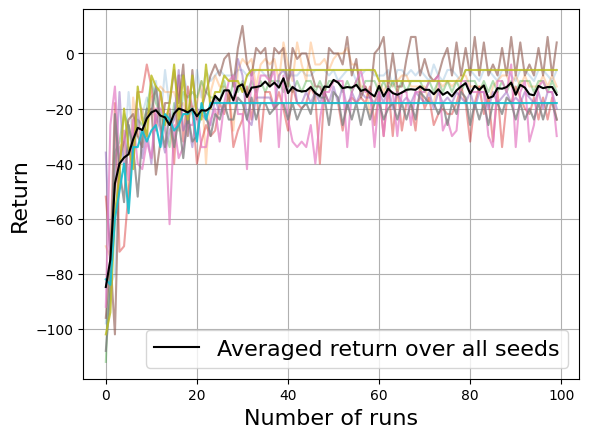

In [76]:
# Plot the average return over 10 random seeds

for r in range(len(AllReturns)):
  #plt.plot(r)
  transparency = 0.2 + 0.8 * (r / len(AllReturns))
  ax = sns.lineplot( x=np.arange(100), y=AllReturns[r], alpha=transparency)

plt.plot(AvReturns, c = 'black', label = 'Averaged return over all seeds')
#plt.plot(random_returns, c = 'r', label = 'Return of random policy')
plt.xlabel('Number of runs', fontsize = 16)
plt.ylabel('Return', fontsize = 16)
plt.grid(True)
plt.legend(fontsize = '16')

'''
df = pd.DataFrame(AllReturns)
df.set_index('Return')
df.head()
ax = sns.lineplot(data=df, x=np.arange(100) y=df.iloc[0])
'''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


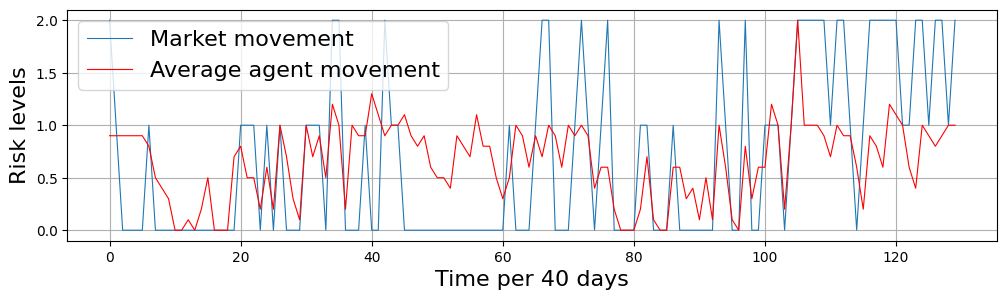

In [77]:
#Plot the learning process

crash_windows = [70, 76, 86, 95, 100, 139, 140, 141, 149, 157, 183, 198, 211, 225]
crash_windows_train = np.subtract(crash_windows,[34]*len(crash_windows)) # We start in 1992 instead of 1986, which is a difference of 34 windows

plt.figure(figsize = (12,3))
plt.plot(thetas, lw=0.8, label = 'Market movement')
plt.plot(AvVisits, color = 'r', lw = 0.8, label = 'Average agent movement')
#plt.vlines(crash_windows_train[:-4], 0, 2, color = 'g', label = 'Crashes')
#plt.plot(p, color='y', lw = 0.8, label='p on crash level')
plt.xlabel('Time per 40 days', fontsize = 16)
plt.ylabel('Risk levels', fontsize =16)
#plt.title('Learning process')
plt.legend(fontsize = '16')
plt.grid(True)
plt.show()

In [78]:
Q_train = AvQvalues

In [79]:
# Use the learned Q values for the test set

newQ = Q_train.copy()
test_agent1 = QAgent(0.4, 0.8, 0.4, newQ) #Note that the learning rate in this case is not worth much
test_agent1.reset_Qvalues(newQ)
test_Qvalues, average_reward_per_episode, Returns, visited_states, sampled_thetas, p, accuracy = RunEpisodes(1, test_agent1, 3, 69, 165, 0.43, 0.675)#0.43,0.675

#print(p)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


68


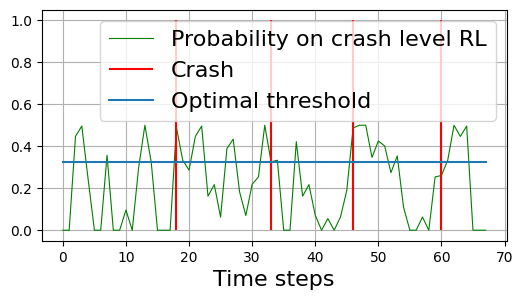

In [80]:
# Plot the probability estimates in the test period

crash_windows = [70, 76, 86, 95, 100, 139, 140, 141, 149, 157, 183, 198, 211, 225]
crash_windows_test = np.subtract(crash_windows,[165]*len(crash_windows))
crash_windows_train = np.subtract(crash_windows,[34]*len(crash_windows))
#print(crash_windows_test)
plt.figure(figsize=(6,3))
'''
plt.subplot(2,1,1)
plt.scatter( dji.index, dji, c= short_dpd, cmap='Reds')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Index values', fontsize=18)

plt.subplot(2,1,2)
'''

rup = [0, 0, 0.3454545, 0.400, 0.40833333, 0.300, 0, 0.3300, 0,0,0,0,0, 0.330, 0.330, 0,0,0, 0.330, 0.330, 0.330, 0.340, 0.340, 0.340, 0, 0, 0.41739130, 0.4083333, 0.450, 0.426086957, 0, 0, 0.41739130, 0.36190476, 0.300, 0,0,0,0,0,0,0,0,0,0,0, 0.330, 0.340,0.340, 0.340, 0, 0.3454545, 0.400, 0.40833333, 0.450, 0,0,0,0,0,0,0, 0.361904762, 0.400, 0.3714285714, 0.3300, 0, 0]
print(len(rup))
#print(sampled_thetas)

#plt.plot(sampled_thetas, color = 'b',lw = 0.8, label = 'Market movement')

#plt.plot(visited_states, color = 'r',lw = 0.8, label = 'agent movements')
#plt.plot(rup, color = 'm',lw = 0.8, label = 'Probability on crash level RUP')
plt.plot(p, color = 'g',lw = 0.8, label = 'Probability on crash level RL')
plt.vlines(crash_windows_test[-4:], 0, 1, color = 'r', label = 'Crash')
plt.plot([0.326]*len(p), label = 'Optimal threshold')

#plt.title('Predicting market crashes')
plt.grid(True)
plt.xlabel('Time steps', fontsize =16)
#plt.ylabel('Predictions')
plt.legend(fontsize = "16")
plt.show()

In [81]:
9# The below crashes have been calculated in the later part of this file
crash_windows = [70, 76, 86, 95, 100, 139, 140, 141, 149, 157, 183, 198, 211, 225]
binary_crashes = [0]*234
for c in crash_windows:
  binary_crashes[c] = 1
print(binary_crashes)

def shift_left(arr):
  return arr[1:] + [0]
classes = shift_left(binary_crashes)
#classes = classes[165:-1]
classes_train = classes[34:164]
classes_test = classes[164:-2]
print(classes_test)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


In [82]:
# The probability estimates by the RUP are calculated in R in Rstudio

rup = [0, 0, 0.3454545, 0.400, 0.40833333, 0.300, 0, 0.3300, 0,0,0,0,0, 0.330, 0.330, 0,0,0, 0.330, 0.330, 0.330, 0.340, 0.340, 0.340, 0, 0, 0.41739130, 0.4083333, 0.450, 0.426086957, 0, 0, 0.41739130, 0.36190476, 0.300, 0,0,0,0,0,0,0,0,0,0,0, 0.330, 0.340,0.340, 0.340, 0, 0.3454545, 0.400, 0.40833333, 0.450, 0,0,0,0,0,0,0, 0.361904762, 0.400, 0.3714285714, 0.3300, 0, 0]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0.45, 0.5, 0.24, 0, 0, 0.36, 0, 0, 0.1, 0, 0.3, 0.5, 0.33, 0, 0, 0, 0.49, 0.33, 0.29, 0.45, 0.5, 0.16, 0.22, 0.06, 0.39, 0.43, 0.18, 0.07, 0.22, 0.25, 0.5, 0.33, 0.33, 0, 0, 0.42, 0.16, 0.22, 0.07, 0, 0.06, 0, 0.06, 0.19, 0.49, 0.5, 0.5, 0.35, 0.43, 0.4, 0.27, 0.35, 0.11, 0, 0, 0.06, 0, 0.25, 0.26, 0.33, 0.5, 0.45, 0.5, 0, 0, 0]
[0, 0, 0.35, 0.4, 0.41, 0.3, 0, 0.33, 0, 0, 0, 0, 0, 0.33, 0.33, 0

[Text(-2.5, 0, ''),
 Text(0.0, 0, ''),
 Text(2.5, 0, ''),
 Text(5.0, 0, ''),
 Text(7.5, 0, ''),
 Text(10.0, 0, ''),
 Text(12.5, 0, ''),
 Text(15.0, 0, ''),
 Text(17.5, 0, ''),
 Text(20.0, 0, '')]

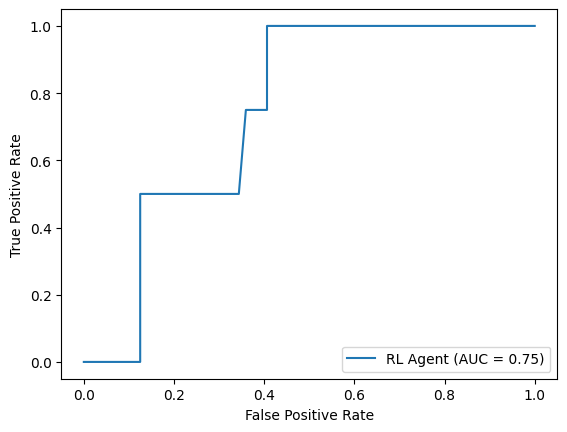

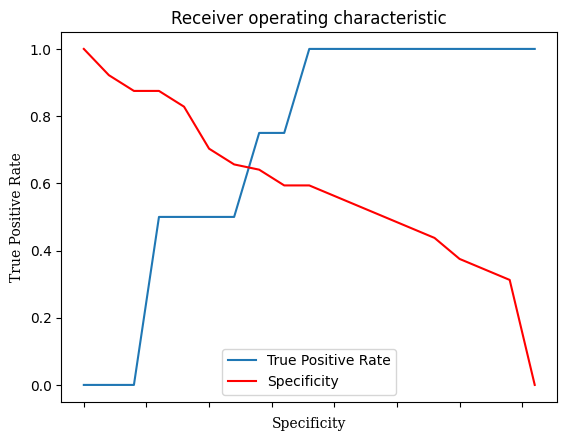

In [88]:
# Displaying the ROC AUC curve

#print(sampled_thetas)
print(classes_test)
print(classes_train)
print([round(p,2) for p in p])
print(([round(r,2) for r in rup]))

# Calculate AUC-ROC
auc_roc1 = roc_auc_score(classes_test, p)
auc_roc_rup = roc_auc_score(classes_test, rup)
print('AUC RL agent', auc_roc1)
print('AUC RUP', auc_roc_rup)
fpr, tpr, thresholds = metrics.roc_curve(classes_test, p)
roc_auc = metrics.auc(fpr, tpr)
#fpr_rup, tpr_rup, thresholds_rup = metrics.roc_curve(classes_test, rup)
#roc_auc_rup = metrics.auc(fpr_rup, tpr_rup)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='RL Agent')
#display_rup = metrics.RocCurveDisplay(fpr=fpr_rup, tpr=tpr_rup, roc_auc=roc_auc_rup, estimator_name='RUP')
display.plot()

#display_rup.plot()

ii = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=ii),'tpr' : pd.Series(tpr, index = ii), '1-fpr' : pd.Series(1-fpr, index = ii), 'tf' : pd.Series(tpr - (1-fpr), index = ii), 'thresholds' : pd.Series(thresholds, index = ii)})
#print(roc.iloc[(roc.tf-0).abs().argsort()[:1]])


# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'], label = 'True Positive Rate')
plt.plot(roc['1-fpr'], color = 'red', label = 'Specificity')
plt.xlabel('Specificity', fontname="Serif")
plt.ylabel('True Positive Rate', fontname="Serif")
plt.title('Receiver operating characteristic')
plt.legend()
ax.set_xticklabels([])

#auc_roc2 = roc_auc_score(classes[:30], p[:30])

In [84]:
# This piece of code is for varying parameters regarding the Q-learning agent such as alpha and epsilon

parameters = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]

def run_multiple_experiments(parameters: list, classes_test: list):
  AUCs = []
  for par_alpha in parameters:
    for par_eps in parameters:
      # Training on 10 random seeds
      AvReturns, AvQvalues, AvP, AvAc, AvVisits, AllReturns = Results_reduced_randomness(QAgent(par_alpha, gamma, par_eps, np.zeros((max_cycle_length, i, j))))
      Q_train = AvQvalues

      # Testing with the obtained averaged Q-values
      newQ = Q_train.copy()
      test_agent1 = QAgent(0.4, 0.8, 0.4, newQ) #Note that the learning rate in this case is not worth much
      test_agent1.reset_Qvalues(newQ)
      test_Qvalues, average_reward_per_episode, Returns, visited_states, sampled_thetas, p, accuracy = RunEpisodes(1, test_agent1, 3, 69, 165, 0.43, 0.675)

      # Calculate AUC
      fpr, tpr, thresholds = metrics.roc_curve(classes_test, p)
      roc_auc = metrics.auc(fpr, tpr)
      AUCs.append(roc_auc)
      print(roc_auc, par_alpha, par_eps)

  return AUCs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
'''
AUCs = run_multiple_experiments(parameters, classes_test)

AUC_reshaped = np.flip(np.reshape(AUCs, (8,8)), axis=0)

heatmap = sns.heatmap(AUC_reshaped, annot=True, xticklabels=[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4], yticklabels=[0.4,0.35,0.3,0.25,0.2,0.15,0.1,0.05])
heatmap.set_ylabel('Learning rate', fontsize=12)
heatmap.set_xlabel('Exploration rate', fontsize=12)
'''

"\nAUCs = run_multiple_experiments(parameters, classes_test)\n\nAUC_reshaped = np.flip(np.reshape(AUCs, (8,8)), axis=0)\n\nheatmap = sns.heatmap(AUC_reshaped, annot=True, xticklabels=[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4], yticklabels=[0.4,0.35,0.3,0.25,0.2,0.15,0.1,0.05])\nheatmap.set_ylabel('Learning rate', fontsize=12)\nheatmap.set_xlabel('Exploration rate', fontsize=12)\n"